In [25]:
import pandas as pd
import json
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import re
import string
from nltk.corpus import stopwords
string.punctuation
from datetime import timedelta
import numpy as np
import nltk
from wordcloud import WordCloud
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Download the stopwords resource
nltk.download('stopwords')


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\mqayum2\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mqayum2\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [26]:
dir_ = "C:\\Users\\mqayum2\\Box\\Spring 2024\\Data Science\\Data Science Final Project\\"


In [27]:
df = pd.read_csv(dir_+"drug_reviews_cleaned.csv")


In [28]:
## I want to 'trim' the the text columns. For example if the value for the drug column is 'Tirzepatide ', I want it to be 'Tirzepatide'
df = df.apply(lambda x: x.str.strip())
## Creating a column for sentiment scores
sid = SentimentIntensityAnalyzer()
df['sentiment'] = [sid.polarity_scores(x)['compound'] for x in df.Comment]

## Getting average sentiment per drug
import statistics
from statistics import mean
for x in df['Drug'].unique():
    print("Average sentiment score for the drug ", x, 'is:',statistics.mean(df[df['Drug']==x].sentiment))

Average sentiment score for the drug  Tirzepatide is: -0.09888760330578512
Average sentiment score for the drug  Ozempic is: -0.1368664
Average sentiment score for the drug  Metformin is: -0.057370247933884295
Average sentiment score for the drug  Sitagliptin is: -0.2552280701754386
Average sentiment score for the drug  Mounjaro is: -0.09362222222222222


<Axes: title={'center': "Sentiment scores of Diabetes drugs' user reviews"}, xlabel='Drug', ylabel='Sentiment score'>

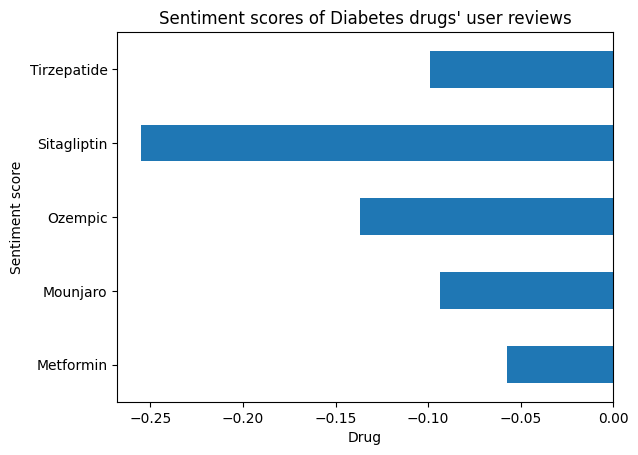

In [29]:
## Creating a chart of the average sentiment of each drug
df.groupby('Drug')['sentiment'].mean().plot(kind='barh', xlabel='Drug', ylabel='Sentiment score',
                                           title="Sentiment scores of Diabetes drugs' user reviews")

**Sitaglptin has the lowest sentiment score out of all drugs. But note that all drugs have negative sentiment scores. This is probably due to the fact that users state their symptoms when reviewing the drugs (e.g., pain, diarrhea, etc.)**

In [30]:
# Creating a function that will remove punctuation
remv_punc = str.maketrans('','',string.punctuation)

In [31]:
# Make the text lowercase
df['lower_text'] =  df['Comment'].str.lower()

In [32]:
remv_punc = str.maketrans('','',string.punctuation + '“' +"‘"+'”')
# Remove the punctuation
df['lower_text_NoPunct'] = df['lower_text'].str.translate(remv_punc)

In [33]:

# Download the stopwords, but add another list with "amp", "", and white space " "
sw_list = stopwords.words('english') + ['amp',''," "]

In [34]:
# split on whitespace to get separate words
df['words'] = [x.split(" ") for x in df['lower_text_NoPunct']]

In [35]:
# Take out stopwords
# Convert the text to a set, subtract the set of stopwords, turn into list
df['words'] = [list(set(x) - set(sw_list)) for x in df['words']]

In [36]:
# Creating an instance of the CountVectorizer with a stop word list.
vct = CountVectorizer(stop_words=sw_list)
# Gives me an output of word counts 
X = vct.fit_transform(list(df['lower_text_NoPunct']))

In [37]:
# make X a dataframe
word_counts = pd.DataFrame(X.sum(axis=0))

In [38]:
word_counts

,0,1,2,3,4,5,6,7,8,9,...,3763,3764,3765,3766,3767,3768,3769,3770,3771,3772
0,1,4,1,1,2,2,16,87,35,9,...,1,4,3,4,1,14,15,1,1,1


In [39]:
# Assign to columns a list of the feature names from .get_feature_names_out()
word_counts.columns = vct.get_feature_names_out()
# Transpose, so that word labels are rows instead of columns
word_counts = word_counts.T

In [40]:
words =  word_counts[0].index

In [41]:
# Look at the first column (0), sort the values, give me the first 20.
word_counts[0].sort_values(ascending=False).head(20)

side          387
effects       337
weight        322
taking        290
started       274
blood         269
metformin     261
day           257
lost          253
a1c           233
sugar         222
weeks         214
eat           211
mounjaro      210
months        207
medication    195
week          194
take          189
get           188
doctor        186
Name: 0, dtype: int64

In [42]:
data = pd.DataFrame(X.toarray(), \
                 columns=word_counts.index)

In [43]:
from sklearn.pipeline import make_pipeline
from sklearn.naive_bayes import MultinomialNB
model = make_pipeline(CountVectorizer(stop_words="english"), MultinomialNB())

In [44]:
data['sentiment'] = df[['sentiment']]

In [45]:
word_counts.reset_index(inplace=True)
word_counts.rename(columns = {'index' : 'Words', 0 : 'Count'}, inplace=True)

In [46]:
word_counts = word_counts.pivot_table(index=None, columns='Words', values='Count', aggfunc='first', fill_value=0)

In [47]:
data

,00,000,000mg,01032020,011723,082322,0mg,10,100,1000,...,youre,yr,yrs,yuck,zero,zofran,zombie,zone,zuchiinni,sentiment
0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,-0.7878
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-0.7081
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.8919
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-0.7478
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-0.4359
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
593,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.7037
594,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-0.5256
595,0,0,0,0,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,-0.7340
596,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-0.0129
